<a href="https://colab.research.google.com/github/ilgindogan/TermDepositPrediction/blob/master/ILGIN_DOGAN_R_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### ILGIN DOĞAN R CASE STUDY


In [ ]:
library(rpart)
library(caret)
library(AppliedPredictiveModeling)

In [ ]:
getwd()

[1] "C:/Users/MONSTER"

##### getwd gives path,this path will set using setwd for reading csv file !! 

In [ ]:
setwd("C:/Users/MONSTER/")

##### csv file in users/monster but you should be change your directory which come with getwd

In [ ]:
bank<-read.csv("term-deposit-marketing-2020.csv",header=TRUE)

In [ ]:
names(bank)


[1] "age"       "job"       "marital"   "education" "default"   "balance"  
 [7] "housing"   "loan"      "contact"   "day"       "month"     "duration" 
[13] "campaign"  "y"

In [ ]:
nrow(bank)

[1] 40000

In [ ]:
str(bank)

'data.frame':	40000 obs. of  14 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 11 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ duration : int  261 151 76 92 198 139 217 380 50 55 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ y        : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
transparentTheme(trans = .4)

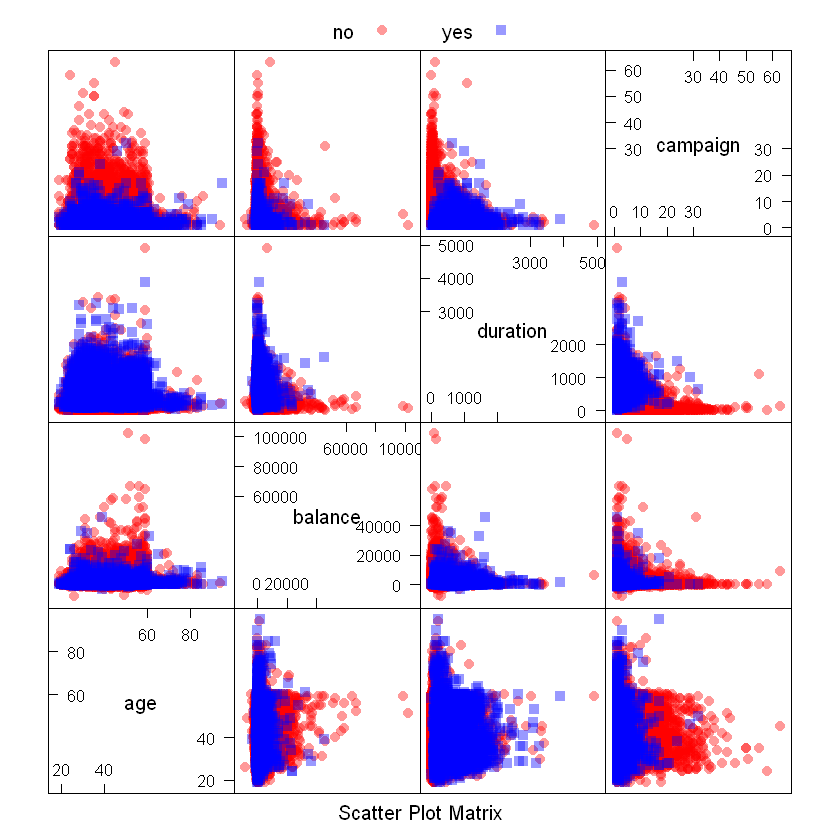

In [ ]:
featurePlot(x = bank[, c(1,6,12,13)], 
 y = bank$y, 
 plot = "pairs",
 auto.key = list(columns = 2))

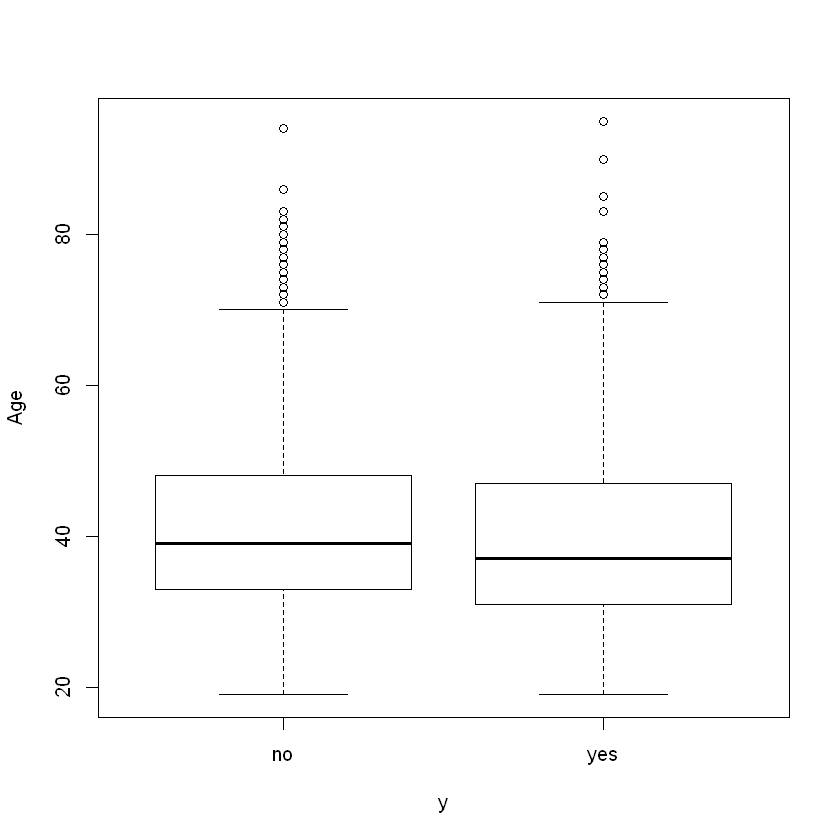

In [ ]:
boxplot(bank$age~bank$y, ylab="Age",xlab="y")

In [ ]:
table(bank$y)


   no   yes 
37104  2896 

In [ ]:
table(bank$y)/nrow(bank)


    no    yes 
0.9276 0.0724 

In [ ]:
set.seed(999)

In [ ]:
trainIndex <- createDataPartition(bank$y, p = .6, 
 list = FALSE, 
 times = 1)

In [ ]:
train <- bank[ trainIndex,]

In [ ]:
test <- bank[-trainIndex,]

In [ ]:
fitControl <- trainControl(
 method = "repeatedcv",
 number = 5,
 repeats = 5)

In [ ]:
fit <- train(y ~ ., data = train, 
 method = "rpart", 
 trControl = fitControl)

In [ ]:
fit

CART 

24001 samples
   13 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 19201, 19200, 19202, 19201, 19200, 19201, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.007479862  0.9318195  0.3456364
  0.009205984  0.9311362  0.3293208
  0.030782509  0.9292113  0.1538480

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.007479862.

In [ ]:
predictions <- predict(fit, test)

In [ ]:
conf.mat <- table(test$y,predictions)
acc <- sum(diag(conf.mat))/sum(conf.mat)
acc

[1] 0.9338709